# A3Q6

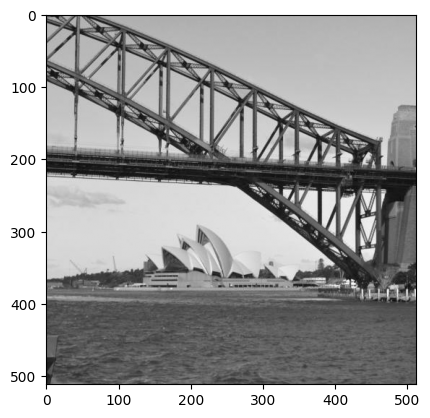

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2

# Load the grayscale image
f = np.array(plt.imread('operahall.png'), dtype=float)
plt.imshow(f, cmap='gray')

## (a)

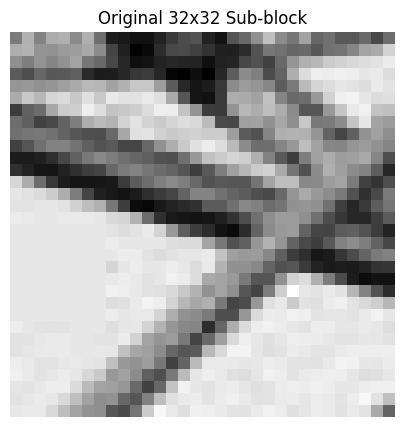

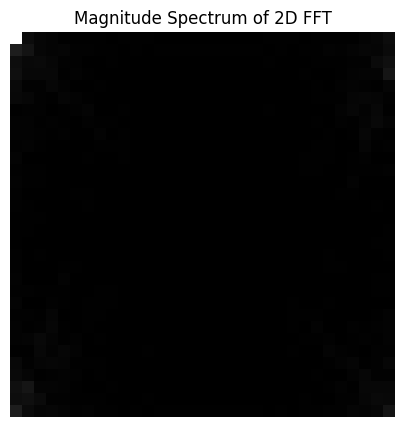

Brightest pixel value: 519.2353082075715


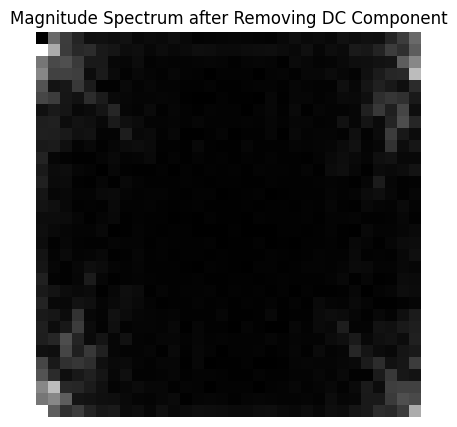

In [2]:
# Extract the top-left 32x32 sub-block
sub_block = f[:32, :32]

# Plot the original sub-block
plt.figure(figsize=(5, 5))
plt.imshow(sub_block, cmap='gray')
plt.title('Original 32x32 Sub-block')
plt.axis('off')
plt.show()

# Compute 2D FFT
F = fft2(sub_block)

# Plot magnitude spectrum
plt.figure(figsize=(5, 5))
plt.imshow(np.abs(F), cmap='gray')
plt.title('Magnitude Spectrum of 2D FFT')
plt.axis('off')
plt.show()

# Find the brightest pixel (highest magnitude coefficient)
Fmax = np.max(np.abs(F))
print("Brightest pixel value:", Fmax)

# Zero out the DC coefficient (at top-left corner)
F[0, 0] = 0

# Plot after zeroing DC coefficient
plt.figure(figsize=(5, 5))
plt.imshow(np.abs(F), cmap='gray')
plt.title('Magnitude Spectrum after Removing DC Component')
plt.axis('off')
plt.show()

## (b)

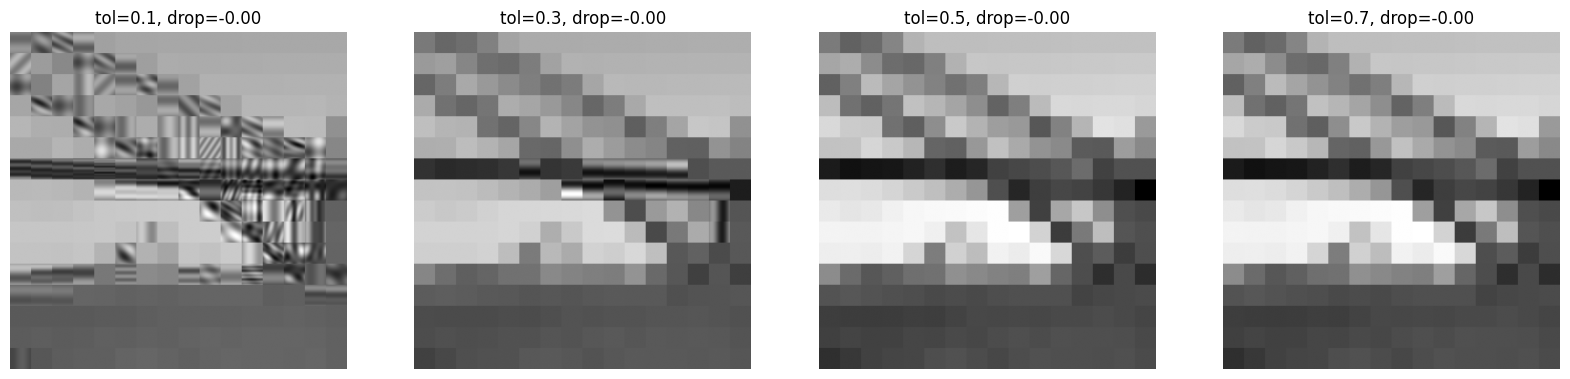

In [3]:
# Compression function
def Compress(X, tol):
    Y = np.copy(X)
    total_nonzero = np.sum(X != 0)

    for i in range(0, X.shape[0], 32):
        for j in range(0, X.shape[1], 32):
            block = Y[i:i+32, j:j+32]
            F_block = fft2(block)
            Fmax_block = np.max(np.abs(F_block))
            F_block[np.abs(F_block) <= Fmax_block * tol] = 0
            Y[i:i+32, j:j+32] = np.real(ifft2(F_block))

    drop_ratio = (total_nonzero - np.sum(Y != 0)) / total_nonzero
    return Y, drop_ratio


# Set tolerance values and compress the image
tol_values = [0.1, 0.3, 0.5, 0.7]
compressed_images = []
drop_ratios = []

for tol in tol_values:
    Y, drop = Compress(f, tol)
    compressed_images.append(Y)
    drop_ratios.append(drop)

# Plot compressed images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, tol in enumerate(tol_values):
    axes[i].imshow(compressed_images[i], cmap='gray')
    axes[i].set_title(f'tol={tol}, drop={drop_ratios[i]:.2f}')
    axes[i].axis('off')
plt.show()

## (c)

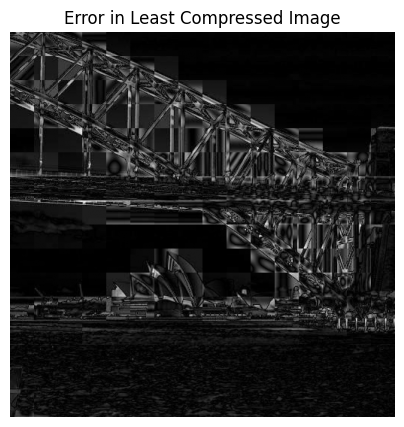

In [4]:
# Visualize error for the least compressed image
error_image = np.abs(f - compressed_images[0])
plt.figure(figsize=(5, 5))
plt.imshow(error_image, cmap='gray')
plt.title('Error in Least Compressed Image')
plt.axis('off')
plt.show()